<a href="https://colab.research.google.com/github/ShalindraPerera/SecondRepo/blob/main/PS_2019_043_Mini_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Relevant Libraries

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

Mount Google Drive

In [7]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change The Current Working Directory

In [8]:
os.chdir("/content/drive/My Drive/Deep Learning/LetterDataSet/")
os .getcwd()

'/content/drive/My Drive/Deep Learning/LetterDataSet'

Check Current Working Directory

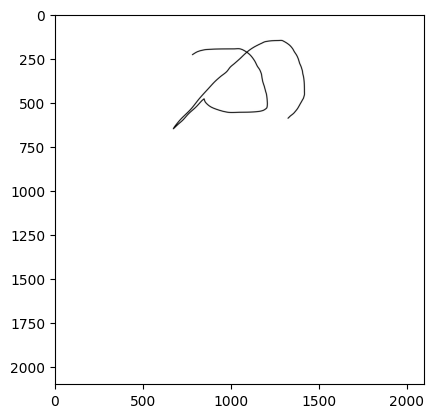

In [9]:
img = image. load_img("Training/Tha/1.jpeg")
plt.imshow(img)

Get The Shape Of The Image

In [10]:
cv2. imread ("Training/Tha/1.jpeg").shape
(875, 875, 3)

(875, 875, 3)

Load The Dataset

In [16]:
#Rescaling
train = ImageDataGenerator (rescale = 1/255)

In [15]:
# Create a training dataset
train_dataset = train.flow_from_directory('Training/',
target_size = (200,200),
batch_size = 3,
class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [25]:
#Identify classes of dataset
train_dataset.class_indices

{'Tha': 0, 'Ya': 1}

Specify The CNN Architecture

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
# MaxPooling layer with pool size (2, 2)
tf .keras.layers.MaxPool2D(2, 2),
# Convolutional layer with 40 filters, each of size (3, 3), and ReLU activation
tf.keras.layers.Conv2D(40, (3,3), activation = 'relu'),
tf.keras.layers.MaxPool2D(2,2),
# Convolutional layer with 80 filters, each of size (3, 3), and ReLU activation
tf.keras.layers.Conv2D(80,(3,3),activation = 'relu'),
tf.keras.layers.MaxPool2D(2,2),
# Flatten layer to convert 3D feature maps to 10 feature vectors
tf.keras.layers.Flatten(),
# Dense (fully connected) layer with 512 units and ReLU activation
tf.keras.layers.Dense (512,activation = 'relu'),
# Output layer with 1 unit and sigmoid activation for binary classification
tf.keras.layers.Dense (1, activation = 'sigmoid')])

Specifying The Training Of The Model

In [26]:
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(learning_rate = 0.001),
              metrics= ['accuracy'])

Training The Model

In [65]:
model_fit = model.fit(train_dataset,
steps_per_epoch = 5,
epochs = 20)

Epoch 1/20
5/5 [==============================] - 7s 1s/step - loss: 1.3451e-06 - accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 4s 864ms/step - loss: 4.7198e-06 - accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 5s 981ms/step - loss: 7.1901e-08 - accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 5s 990ms/step - loss: 4.4784e-06 - accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 5s 875ms/step - loss: 3.3693e-06 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 3.7837e-06 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 4s 863ms/step - loss: 2.4931e-06 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 6s 1s/step - loss: 5.8288e-07 - accuracy: 1.0000
Epoch 9/20
5/5 [==============================] - 4s 856ms/step - loss: 3.9801e-06 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 4s 858ms/step - loss: 3.8983e-06 - accur

Model Evaluation

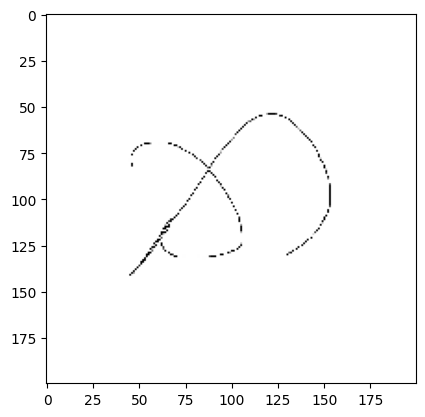

1/1 [==============================] - 0s 49ms/step
This is Letter 'ත' in sinhala


In [69]:
dir_path = 'Testing/'
image_filename = '4.jpeg'
# Load the image
img = image.load_img(dir_path + image_filename, target_size=(200, 200))
# Display the image
plt.imshow (img)
plt.show()
# Convert the image to a NumPy array and add an extra dimension
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
# Make a prediction using the trained model
val = model.predict (X)
if val == 0:
   print("This is Letter 'ත' in sinhala")
else:
   print("This is Letter 'ය' in sinhala")